# Random Forest Classifier
Random Forest Classifier is a popular supervised learning algorithm used for classification tasks. It is an ensemble learning algorithm that combines multiple decision trees to make a final prediction. The algorithm works by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes predicted by individual trees.

The basic steps involved in training a Random Forest Classifier are as follows:

Randomly select a subset of the data from the training set.
For each subset, construct a decision tree by selecting the best split point among the features using a criterion such as Gini impurity or information gain.
Repeat steps 1 and 2 to create multiple decision trees.
To make a prediction, pass the data through all the decision trees and output the class that is the mode of the classes predicted by individual trees.
One of the main advantages of Random Forest Classifier is that it can handle high-dimensional data with a large number of features. It also has a low risk of overfitting since it combines the predictions of multiple trees, reducing the variance of the model. Additionally, it is robust to missing data and outliers.

Some of the applications of Random Forest Classifier include credit risk assessment, disease diagnosis, and customer churn prediction.

# SHAP (SHapley Additive exPlanations)
SHAP (SHapley Additive exPlanations) is a game-theoretic approach to explain the output of any machine learning model. It is a model-agnostic algorithm that can be applied to any type of model, including neural networks, decision trees, and ensemble models. The goal of SHAP is to explain the contribution of each feature in the model output for a specific data point.

The SHAP values represent the contribution of a feature to the difference between the actual prediction and the expected prediction. The expected prediction is the average prediction of the model over the training set. The SHAP values have the desirable property that they satisfy the properties of Shapley values, which is a concept in cooperative game theory that provides a way to fairly allocate the contribution of each player in a group to the outcome of the game.

SHAP values can be used for various tasks, such as feature importance, local interpretation, and global interpretation. In feature importance, SHAP values provide a ranking of the most important features for a given model. In local interpretation, SHAP values provide an explanation of the model output for a specific data point. In global interpretation, SHAP values provide a summary of the model behavior across the entire dataset.

Some of the applications of SHAP include identifying the most important features in credit risk assessment, understanding the effect of demographic factors on voting behavior, and identifying the most influential factors in predicting stock prices.

In [1]:
#importing library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

In [7]:
df=pd.read_csv('/kaggle/input/adl-classification/dataset.csv',names=['MQ1','MQ2','MQ3','MQ4',"MQ5",'MQ6','CO2'])
#showing the dataset
df

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6,CO2
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


# Getting the Information about the Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MQ1     1845 non-null   int64
 1   MQ2     1845 non-null   int64
 2   MQ3     1845 non-null   int64
 3   MQ4     1845 non-null   int64
 4   MQ5     1845 non-null   int64
 5   MQ6     1845 non-null   int64
 6   CO2     1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


tree based not required scaling the data

# Preprocessing the Dataset

In [12]:
def preprocess_inputs(df):
    df=df.copy()
    y=df['CO2']
    x=df.drop('CO2',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True)
    return x_train,x_test,y_train,y_test

In [13]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1291, 6)
(554, 6)
(1291,)
(554,)


# Training the Dataset

In [14]:
model=RandomForestClassifier(random_state=1)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

# Checking the Score of the Model

In [16]:
score=model.score(x_test,y_test)
print('Accuracy',score)

Accuracy 0.9584837545126353


# Feature Impac With Shap Values

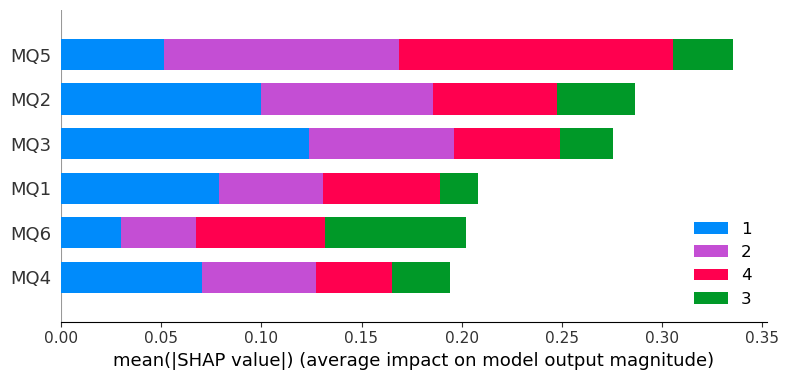

In [19]:
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test,class_names=model.classes_)